In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

sns.set()

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
# from IPython.core.display import display, HTML
from IPython.display import display, HTML
display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

# <b>Data Load

In [2]:
df  = pd.read_csv("./data/Diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<pre>
Pregnancies              : Number of times pregnant
Glucose                  : Plasma glucose concentration a 2 hours in an oral glucose tolerance test
BloodPressure            : Diastolic blood pressure (mm Hg)
SkinThickness            : Triceps skin fold thickness (mm)
Insulin                  : 2-Hour serum insulin (mu U/ml)
BMI                      : Body mass index (weight in kg/(height in m)^2)
DiabetesPedigreeFunction : Diabetes pedigree function  # 당뇨유전수치
Age                      : Age (years)
Outcome                  : Class variable (0 or 1) 268 of 768 are 1, the others are 0

# <b>Model selection

In [5]:
#-----------------------모델선택-----------------------------------------------------------
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier    #, XGBRegressor
from lightgbm import LGBMClassifier  #, LGBMRegressor



#-----------------------전처리-----------------------------------------------------------
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (MinMaxScaler, RobustScaler, StandardScaler,
                                   LabelEncoder, OneHotEncoder)
from sklearn.model_selection import (train_test_split, KFold, StratifiedKFold, cross_val_score,
                                    cross_validate, GridSearchCV)

#-----------------------평가-----------------------------------------------------------
# from sklearn.metrics import mean_squared_error 
from sklearn.metrics import (accuracy_score, f1_score , precision_score , recall_score, precision_recall_curve, 
                            roc_curve, roc_auc_score, classification_report, confusion_matrix)



<table class="table">
<thead>
<tr class="row-odd"><th class="head"><p>Scoring string name</p></th>
<th class="head"><p>Function</p></th>
<th class="head"><p>Comment</p></th>
</tr>
</thead>
<tbody>
<tr class="row-even"><td><p><strong>Classification</strong></p></td>
<td></td>
<td></td>
</tr>
<tr class="row-odd"><td><p><font color=red><b>‘accuracy’</b></font></p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score" title="sklearn.metrics.accuracy_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.accuracy_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-even"><td><p><p><font color=red><b>‘f1’</b></font></p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score" title="sklearn.metrics.f1_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.f1_score</span></code></a></p></td>
<td><p>for binary targets</p></td>
</tr>
<tr class="row-odd"><td><p>‘f1_micro’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score" title="sklearn.metrics.f1_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.f1_score</span></code></a></p></td>
<td><p>micro-averaged</p></td>
</tr>
<tr class="row-even"><td><p>‘f1_macro’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score" title="sklearn.metrics.f1_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.f1_score</span></code></a></p></td>
<td><p>macro-averaged</p></td>
</tr>
<tr class="row-odd"><td><p>‘f1_weighted’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score" title="sklearn.metrics.f1_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.f1_score</span></code></a></p></td>
<td><p>weighted average</p></td>
</tr>
<tr class="row-even"><td><p><p><font color=red><b>‘precision’ etc.</b></font></p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score" title="sklearn.metrics.precision_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.precision_score</span></code></a></p></td>
<td><p>suffixes apply as with ‘f1’</p></td>
</tr>
<tr class="row-odd"><td><p><p><font color=red><b>‘recall’ etc.</b></font></p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score" title="sklearn.metrics.recall_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.recall_score</span></code></a></p></td>
<td><p>suffixes apply as with ‘f1’</p></td>
</tr>
<tr class="row-odd"><td><p><p><font color=red><b>‘roc_auc’</b></font></p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score" title="sklearn.metrics.roc_auc_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.roc_auc_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-even"><td><p>‘roc_auc_ovr’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score" title="sklearn.metrics.roc_auc_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.roc_auc_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-odd"><td><p>‘roc_auc_ovo’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score" title="sklearn.metrics.roc_auc_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.roc_auc_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-even"><td><p>‘roc_auc_ovr_weighted’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score" title="sklearn.metrics.roc_auc_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.roc_auc_score</span></code></a></p></td>
<td></td>
</tr>
</tbody>
</table>

# <b>EDA

<Figure size 1000x500 with 0 Axes>

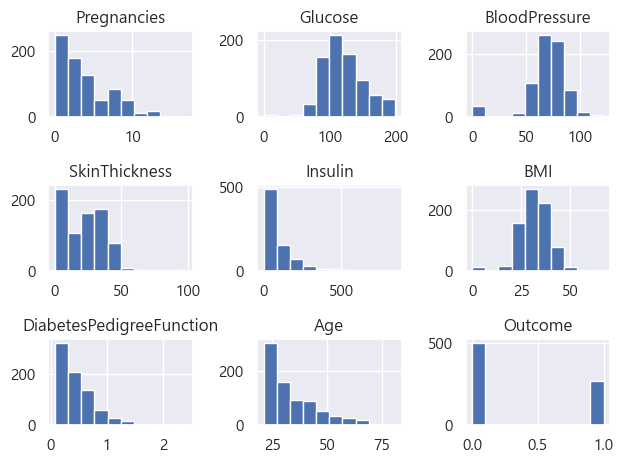

In [6]:
plt.figure(figsize=(10,5))
df.hist()
plt.tight_layout()
plt.show()

<pre> 이상치 기준
Glucose          < 140        ≥ 200
BloodPressure    60 – 80      ≥ 90
SkinThickness   18 ~ 30       > 30–35
Insulin         16 ~ 166
BMI             17 ~ 23       ≥ 30
DPF                           > 0.6> 1.0

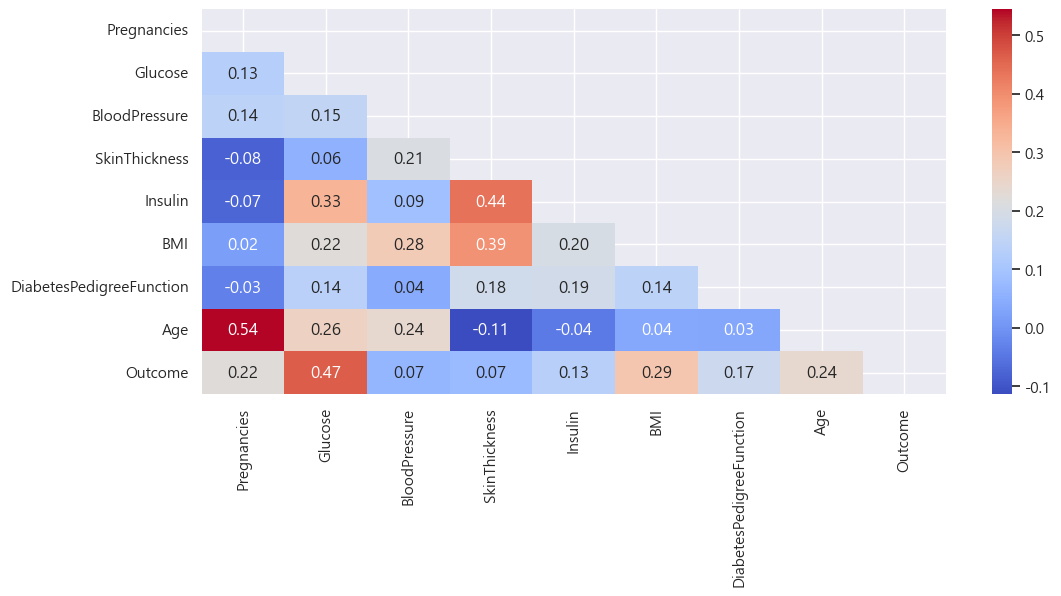

In [7]:
plt.figure(figsize=(12, 5))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), annot=True, fmt=".2f", mask=mask, cmap='coolwarm')     #---------------------------- sns 히트맵
plt.show()

In [8]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
df.columns = ['pgcnt', 'glucose', 'bpress', 'skin', 'insulin','bmi', 'dpf', 'age', 'target']

In [10]:
df.columns

Index(['pgcnt', 'glucose', 'bpress', 'skin', 'insulin', 'bmi', 'dpf', 'age',
       'target'],
      dtype='object')

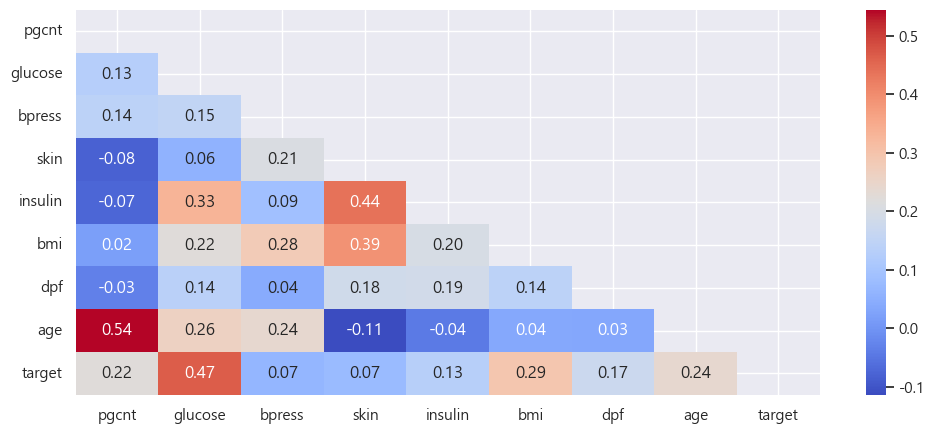

In [11]:
plt.figure(figsize=(12, 5))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), annot=True, fmt=".2f", mask=mask, cmap='coolwarm')     #---------------------------- sns 히트맵
plt.show()

In [12]:
y = df['target']
X = df.drop(['target'], axis=1)
X.shape, y.shape

((768, 8), (768,))

In [13]:
y.value_counts()

target
0    500
1    268
Name: count, dtype: int64

# <b> 기본모델 확인

In [14]:
def myscore(df) :
    
    y = df['target']
    X = df.drop(['target'], axis=1)
    X.shape, y.shape
    
    model_list = [LogisticRegression(), DecisionTreeClassifier(random_state=234), RandomForestClassifier(random_state=234), 
                  XGBClassifier(random_state=234), LGBMClassifier(verbosity=-1, random_state=234)]
    X80, X20, y80, y20 = train_test_split(X, y, test_size = 0.2, random_state=4567, stratify=y)
    for model in model_list:
        
        print('===='*20)
        print(f" {model.__class__.__name__}" )
        print('===='*20)
        model.fit(X80, y80)
        pred = model.predict(X20)
        acc = accuracy_score(y20, pred)
        f1 = f1_score(y20, pred)
        precision = precision_score(y20, pred)
        recall = recall_score(y20, pred)
        roc_auc = roc_auc_score(y20, pred)
        report = classification_report(y20, pred)
        cm = confusion_matrix(y20, pred)
        print(f"acc:{acc:.4f}\t f1:{f1:.4f}\t precision:{precision:.4f}\t recall:{recall:.4f}\t roc_auc:{roc_auc:.4f}")
        print()
        print(report)
        print()
        print(cm)
        print()
        
    

In [15]:
myscore(df)

 LogisticRegression
acc:0.7727	 f1:0.6237	 precision:0.7436	 recall:0.5370	 roc_auc:0.7185

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       100
           1       0.74      0.54      0.62        54

    accuracy                           0.77       154
   macro avg       0.76      0.72      0.73       154
weighted avg       0.77      0.77      0.76       154


[[90 10]
 [25 29]]

 DecisionTreeClassifier
acc:0.7208	 f1:0.5981	 precision:0.6038	 recall:0.5926	 roc_auc:0.6913

              precision    recall  f1-score   support

           0       0.78      0.79      0.79       100
           1       0.60      0.59      0.60        54

    accuracy                           0.72       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.72      0.72      0.72       154


[[79 21]
 [22 32]]

 RandomForestClassifier
acc:0.7273	 f1:0.5714	 precision:0.6364	 recall:0.5185	 roc_auc:0.6793

              precis

# <b> 전처리

<div align="center" style="background-color: #fcfcfc; padding: 20px; border-radius: 12px; border: 1px solid #eee; max-width: 500px; margin: 20px auto;">
  <h3 style="color: #333; margin-top: 5px; text-align: center;">📊 왜도(Skewness) 핵심 요약</h3>
  
  <div style="display: flex; justify-content: flex-start; background-color: white; padding: 10px; border-radius: 8px; margin-bottom: 15px;">
    <img src="https://datadoctorblog.com/images/Statistics/stat_descriptive_statistics_skewness_samples.png" 
         width="300px" 
         style="max-height: 100px; object-fit: contain;" 
         alt="Skewness Samples">
  </div>

  <div style="text-align: center; font-family: sans-serif;">
    <table style="width: 100%; border-collapse: collapse; font-size: 0.85em;">
      <tr style="border-bottom: 1px solid #eee;">
        <td style="padding: 8px; color: #e74c3c; width: 30%;"><b>Negative (Left)</b></td>
        <td style="padding: 8px; text-align: center;">평균 < 중앙값 < <b>최빈값</b></td>
      </tr>
      <tr style="border-bottom: 1px solid #eee;">
        <td style="padding: 8px; color: #2ecc71;"><b>Normal (Symm)</b></td>
        <td style="padding: 8px; text-align: center;">평균 = 중앙값 = 최빈값</td>
      </tr>
      <tr>
        <td style="padding: 8px; color: #3498db;"><b>Positive (Right)</b></td>
        <td style="padding: 8px; text-align: center;"><b>최빈값</b> < 중앙값 < 평균</td>
      </tr>
    </table>
  </div>
</div>

<div align="center" style="background-color: #fcfcfc; padding: 20px; border-radius: 12px; border: 1px solid #eee; max-width: 500px; margin: 20px auto;">
  <h3 style="color: #333; margin-top: 5px; text-align: center;">📉 첨도(Kurtosis) 핵심 요약</h3>
  
  <div style="display: flex; justify-content: flex-start; background-color: white; padding: 10px; border-radius: 8px; margin-bottom: 15px;">
    <img src="https://blog.kakaocdn.net/dna/b8xPjD/btrReFDu99P/AAAAAAAAAAAAAAAAAAAAAH3avPKlQwdXraOjmH6O3cR9MgH4Qfh03GDvvjcqiKCH/img.png?credential=yqXZFxpELC7KVnFOS48ylbz2pIh7yKj8&expires=1769871599&allow_ip=&allow_referer=&signature=cZcCS%2F38HcIfPuXPsY8DZd7c3Es%3D" 
         width="300px"
         style="max-height: 100px; object-fit: contain;"
         alt="Kurtosis Samples">
  </div>

  <div style="text-align: center; font-family: sans-serif;">
    <table style="width: 100%; border-collapse: collapse; font-size: 0.85em;">
      <tr style="border-bottom: 1px solid #eee;">
        <td style="padding: 8px; color: #9b59b6; width: 30%;"><b>Lepto (고첨)</b></td>
        <td style="padding: 8px; text-align: center;">K > 0 | 뾰족함, <b>두꺼운 꼬리</b></td>
      </tr>
      <tr style="border-bottom: 1px solid #eee;">
        <td style="padding: 8px; color: #2ecc71;"><b>Meso (중첨)</b></td>
        <td style="padding: 8px; text-align: center;">K = 0 | 정규분포와 동일함</td>
      </tr>
      <tr>
        <td style="padding: 8px; color: #f39c12;"><b>Platy (저첨)</b></td>
        <td style="padding: 8px; text-align: center;">K < 0 | 평평함, 꼬리가 얇음</td>
      </tr>
    </table>
  </div>
</div>


<div align="center" style="background-color: #fcfcfc; padding: 20px; border-radius: 12px; border: 1px solid #eee; max-width: 500px; margin: 20px auto;">
  <h3 style="color: #333; margin-top: 5px; text-align: center;">📉 첨도(Kurtosis)와 이상치 리스크</h3>
  
  <div style="display: flex; justify-content: flex-start; background-color: white; padding: 10px; border-radius: 8px; margin-bottom: 15px;">
    <img src="https://blog.kakaocdn.net/dna/cHM3yX/btrXgSjtLWP/AAAAAAAAAAAAAAAAAAAAAPTjgO5CA66E5SEQTmcGqjgk8loLnqBTSiYj-Tt36yqf/img.png?credential=yqXZFxpELC7KVnFOS48ylbz2pIh7yKj8&expires=1769871599&allow_ip=&allow_referer=&signature=aKf4CAs22RYn2aFX92jkU3UNu4w%3D" 
         width="300px" 
         style="max-height: 120px; object-fit: contain;" 
         alt="Kurtosis Risk Samples">
  </div>

  <div style="text-align: center; font-family: sans-serif;">
    <table style="width: 100%; border-collapse: collapse; font-size: 0.85em;">
      <tr style="border-bottom: 1px solid #eee;">
        <td style="padding: 10px; color: #9b59b6; width: 30%;"><b>고첨 (Lepto)</b></td>
        <td style="padding: 10px; text-align: left;">중앙 밀집도가 높지만, <b>꼬리가 매우 두꺼워</b> 극단적 이상치가 빈번함.</td>
      </tr>
      <tr>
        <td style="padding: 10px; color: #f39c12;"><b>저첨 (Platy)</b></td>
        <td style="padding: 10px; text-align: left;">중앙은 낮고 넓게 퍼져 있으며, 극단적인 이상치 발생 확률이 낮음.</td>
      </tr>
    </table>
  </div>
  
  <div style="margin-top: 15px; font-size: 0.8em; color: #e74c3c; background: #fff5f5; padding: 8px; border-radius: 5px; text-align: left;">
    ⚠️ <b>주의:</b> 뾰족하다고 안심 금물! 꼬리 영역(Tail)의 면적이 정규분포보다 넓어 "Black Swan" 사건이 숨어있을 가능성이 큼.
  </div>
</div>

In [16]:
df['age2'] = df['age']//10

In [17]:
df.groupby('target')[['glucose', 'bpress', 'skin', 'insulin', 'bmi', 'dpf', 'age', 'age2']].mean()

,glucose,bpress,skin,insulin,bmi,dpf,age,age2
target,,,,,,,,
0,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000,2.718000
1,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164,3.287313


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   pgcnt    768 non-null    int64  
 1   glucose  768 non-null    int64  
 2   bpress   768 non-null    int64  
 3   skin     768 non-null    int64  
 4   insulin  768 non-null    int64  
 5   bmi      768 non-null    float64
 6   dpf      768 non-null    float64
 7   age      768 non-null    int64  
 8   target   768 non-null    int64  
 9   age2     768 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 60.1 KB


In [19]:
df.groupby(['target', 'age2'])[['glucose', 'bpress', 'skin', 'insulin', 'bmi', 'dpf', 'age']].agg(['mean', 'count'])

glucose           bpress             skin           insulin  \
                   mean count       mean count       mean count        mean   
target age2                                                                   
0      2     106.503205   312  65.326923   312  20.932692   312   76.121795   
       3     113.348315    89  71.191011    89  19.988764    89   75.067416   
       4     109.509434    53  72.905660    53  19.754717    53   46.075472   
       5     123.782609    23  78.782609    23   8.565217    23   33.347826   
       6     131.857143    21  77.333333    21  11.666667    21   33.142857   
       7     119.000000     1   0.000000     1   0.000000     1    0.000000   
       8     134.000000     1  74.000000     1  33.000000     1   60.000000   
1      2     140.642857    84  65.428571    84  25.726190    84  115.119048   
       3     139.315789    76  67.881579    76  20.105263    76   81.026316   
       4     136.984615    65  74.784615    65  20.476923    65   78.430769   
       5     151.441176    34  80.500000    34  22.558824    34  160.852941   
       6     157.125000     8  80.750000     8  16.875000     8   61.875000   
       7     145.000000     1  82.000000     1  18.000000     1    0.000000   

                         bmi             dpf              age        
            count       mean count      mean count       mean count  
target age2                                                          
0      2      312  29.852885   312  0.416926   312  24.028846   312  
       3       89  30.923596    89  0.470697    89  34.123596    89  
       4       53  33.318868    53  0.422755    53  43.471698    53  
       5       23  30.221739    23  0.471217    23  54.608696    23  
       6       21  27.585714    21  0.398000    21  64.190476    21  
       7        1  19.600000     1  0.832000     1  72.000000     1  
       8        1  25.900000     1  0.460000     1  81.000000     1  
1      2       84  37.101190    84  0.577786    84  25.369048    84  
       3       76  34.285526    76  0.595250    76  34.092105    76  
       4       65  35.676923    65  0.459462    65  43.461538    65  
       5       34  32.094118    34  0.567971    34  53.323529    34  
       6        8  31.662500     8  0.543750     8  63.000000     8  
       7        1  32.500000     1  0.235000     1  70.000000     1

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   pgcnt    768 non-null    int64  
 1   glucose  768 non-null    int64  
 2   bpress   768 non-null    int64  
 3   skin     768 non-null    int64  
 4   insulin  768 non-null    int64  
 5   bmi      768 non-null    float64
 6   dpf      768 non-null    float64
 7   age      768 non-null    int64  
 8   target   768 non-null    int64  
 9   age2     768 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 60.1 KB


In [21]:
# 1. 0을 결측치(NaN)로 먼저 변환 (0인 상태에서는 평균 계산에 포함되어 왜곡이 발생함)
col_list = ['glucose', 'bpress', 'skin', 'insulin', 'bmi', 'dpf']
df[col_list] = df[col_list].replace(0, np.nan)


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   pgcnt    768 non-null    int64  
 1   glucose  763 non-null    float64
 2   bpress   733 non-null    float64
 3   skin     541 non-null    float64
 4   insulin  394 non-null    float64
 5   bmi      757 non-null    float64
 6   dpf      768 non-null    float64
 7   age      768 non-null    int64  
 8   target   768 non-null    int64  
 9   age2     768 non-null    int64  
dtypes: float64(6), int64(4)
memory usage: 60.1 KB


<Figure size 1000x500 with 0 Axes>

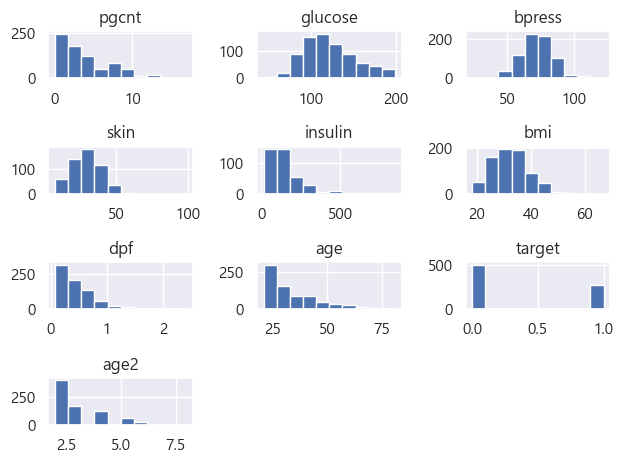

In [23]:
plt.figure(figsize=(10,5))
df.hist()
plt.tight_layout()
plt.show()

In [24]:
# 1. 0을 결측치(NaN)로 먼저 변환 (0인 상태에서는 평균 계산에 포함되어 왜곡이 발생함)
col_list = ['glucose', 'bpress', 'skin', 'insulin', 'bmi', 'dpf']
df[col_list] = df[col_list].replace(0, np.nan)


# 2. 'target'과 'age2' 그룹별 평균으로 NaN을 대체
# transform('mean')은 그룹별 평균을 계산하여 원래 데이터프레임의 인덱스 순서에 맞게 반환함
df[col_list] = df[col_list].fillna(
    df.groupby(['target', 'age2'])[col_list].transform('mean')
)

# 3. (추가 조치) 만약 특정 그룹 전체가 0(NaN)이라서 여전히 NaN인 경우, target 별 전체 평균으로 최종 보정
df[col_list] = df[col_list].fillna(
    df.groupby('target')[col_list].transform('mean')
)
# 결과 확인
print(df[col_list].isnull().sum()) # 결측치가 모두 사라졌는지 확인

glucose    0
bpress     0
skin       0
insulin    0
bmi        0
dpf        0
dtype: int64


In [25]:
df.groupby(['target', 'age2'])[['glucose', 'bpress', 'skin', 'insulin', 'bmi', 'dpf', 'age']].agg(['mean', 'count'])

glucose           bpress             skin           insulin  \
                   mean count       mean count       mean count        mean   
target age2                                                                   
0      2     107.537217   312  68.167224   312  26.019920   312  123.697917   
       3     113.348315    89  73.674419    89  29.650000    89  155.372093   
       4     109.509434    53  75.764706    53  31.727273    53  122.100000   
       5     123.782609    23  78.782609    23  28.142857    23  153.400000   
       6     131.857143    21  77.333333    21  27.222222    21  232.000000   
       7     119.000000     1  70.843139     1  27.435998     1  134.976686   
       8     134.000000     1  74.000000     1  33.000000     1   60.000000   
1      2     140.642857    84  71.376623    84  34.854839    84  201.458333   
       3     141.173333    76  73.700000    76  31.833333    76  175.942857   
       4     139.125000    65  78.403226    65  31.690476    65  196.076923   
       5     151.441176    34  80.500000    34  30.680000    34  273.450000   
       6     157.125000     8  80.750000     8  67.500000     8  495.000000   
       7     145.000000     1  82.000000     1  18.000000     1  210.848154   

                         bmi             dpf              age        
            count       mean count      mean count       mean count  
target age2                                                          
0      2      312  30.638487   312  0.416926   312  24.028846   312  
       3       89  30.923596    89  0.470697    89  34.123596    89  
       4       53  33.318868    53  0.422755    53  43.471698    53  
       5       23  30.221739    23  0.471217    23  54.608696    23  
       6       21  28.965000    21  0.398000    21  64.190476    21  
       7        1  19.600000     1  0.832000     1  72.000000     1  
       8        1  25.900000     1  0.460000     1  81.000000     1  
1      2       84  37.101190    84  0.577786    84  25.369048    84  
       3       76  34.742667    76  0.595250    76  34.092105    76  
       4       65  35.676923    65  0.459462    65  43.461538    65  
       5       34  33.066667    34  0.567971    34  53.323529    34  
       6        8  31.662500     8  0.543750     8  63.000000     8  
       7        1  32.500000     1  0.235000     1  70.000000     1

<Figure size 1000x500 with 0 Axes>

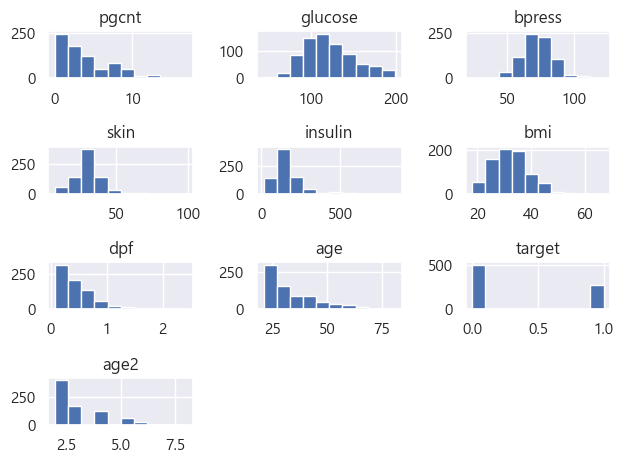

In [26]:
plt.figure(figsize=(10,5))
df.hist()
plt.tight_layout()
plt.show()

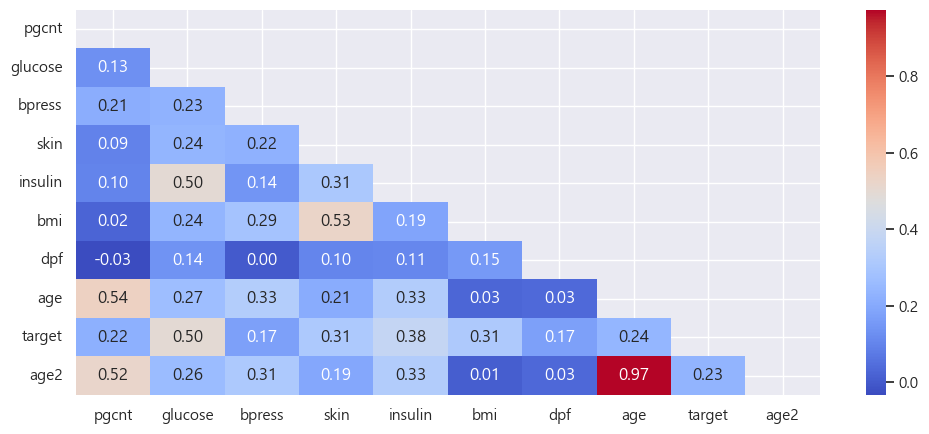

In [27]:
plt.figure(figsize=(12, 5))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), annot=True, fmt=".2f", mask=mask, cmap='coolwarm')     #---------------------------- sns 히트맵
plt.show()

In [28]:
myscore(df.drop('age', axis=1))

 LogisticRegression
acc:0.7857	 f1:0.6526	 precision:0.7561	 recall:0.5741	 roc_auc:0.7370

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       100
           1       0.76      0.57      0.65        54

    accuracy                           0.79       154
   macro avg       0.78      0.74      0.75       154
weighted avg       0.78      0.79      0.78       154


[[90 10]
 [23 31]]

 DecisionTreeClassifier
acc:0.7532	 f1:0.6607	 precision:0.6379	 recall:0.6852	 roc_auc:0.7376

              precision    recall  f1-score   support

           0       0.82      0.79      0.81       100
           1       0.64      0.69      0.66        54

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.76       154


[[79 21]
 [17 37]]

 RandomForestClassifier
acc:0.8377	 f1:0.7788	 precision:0.7458	 recall:0.8148	 roc_auc:0.8324

              precis

In [29]:
myscore(df.drop('age2', axis=1))

 LogisticRegression
acc:0.7662	 f1:0.6400	 precision:0.6957	 recall:0.5926	 roc_auc:0.7263

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       100
           1       0.70      0.59      0.64        54

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.73       154
weighted avg       0.76      0.77      0.76       154


[[86 14]
 [22 32]]

 DecisionTreeClassifier
acc:0.7727	 f1:0.6903	 precision:0.6610	 recall:0.7222	 roc_auc:0.7611

              precision    recall  f1-score   support

           0       0.84      0.80      0.82       100
           1       0.66      0.72      0.69        54

    accuracy                           0.77       154
   macro avg       0.75      0.76      0.76       154
weighted avg       0.78      0.77      0.77       154


[[80 20]
 [15 39]]

 RandomForestClassifier
acc:0.8636	 f1:0.8073	 precision:0.8000	 recall:0.8148	 roc_auc:0.8524

              precis

In [30]:
print(df.skew())
print(df.kurt, df.kurtosis())

pgcnt      0.901674
glucose    0.532182
bpress     0.145317
skin       1.018847
insulin    2.432248
bmi        0.605476
dpf        1.919911
age        1.129597
target     0.635017
age2       1.198297
dtype: float64
<bound method DataFrame.kurt of      pgcnt  glucose  bpress       skin     insulin   bmi    dpf  age  target  \
0        6    148.0    72.0  35.000000  273.450000  33.6  0.627   50       1   
1        1     85.0    66.0  29.000000  155.372093  26.6  0.351   31       0   
2        8    183.0    64.0  31.833333  175.942857  23.3  0.672   32       1   
3        1     89.0    66.0  23.000000   94.000000  28.1  0.167   21       0   
4        0    137.0    40.0  35.000000  168.000000  43.1  2.288   33       1   
..     ...      ...     ...        ...         ...   ...    ...  ...     ...   
763     10    101.0    76.0  48.000000  180.000000  32.9  0.171   63       0   
764      2    122.0    70.0  27.000000  123.697917  36.8  0.340   27       0   
765      5    121.0    72.0  23.0

In [31]:
df.describe()

,pgcnt,glucose,bpress,skin,insulin,bmi,dpf,age,target,age2
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.679570,72.369291,29.591328,161.452667,32.437737,0.471876,33.240885,0.348958,2.916667
std,3.369578,30.463446,12.117224,9.542169,95.144003,6.879318,0.331329,11.760232,0.476951,1.172627
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000,2.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000,2.000000
50%,3.000000,117.000000,72.000000,29.650000,141.000000,32.050000,0.372500,29.000000,0.000000,2.000000
75%,6.000000,141.000000,80.000000,34.000000,196.076923,36.600000,0.626250,41.000000,1.000000,4.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000,8.000000


In [32]:
df['insulin_log'] = np.log1p(df['insulin'])
df['dpf_log'] = np.log1p(df['dpf'])
df['age_log'] = np.log1p(df['age'])

In [33]:
print(df.skew(), '\n',df.kurtosis())

pgcnt          0.901674
glucose        0.532182
bpress         0.145317
skin           1.018847
insulin        2.432248
bmi            0.605476
dpf            1.919911
age            1.129597
target         0.635017
age2           1.198297
insulin_log   -0.480814
dpf_log        1.117942
age_log        0.614664
dtype: float64 
 pgcnt          0.159220
glucose       -0.268034
bpress         1.071722
skin           4.919136
insulin        9.512046
bmi            0.917060
dpf            5.594954
age            0.643159
target        -1.600930
age2           0.713739
insulin_log    1.860969
dpf_log        1.391303
age_log       -0.645917
dtype: float64


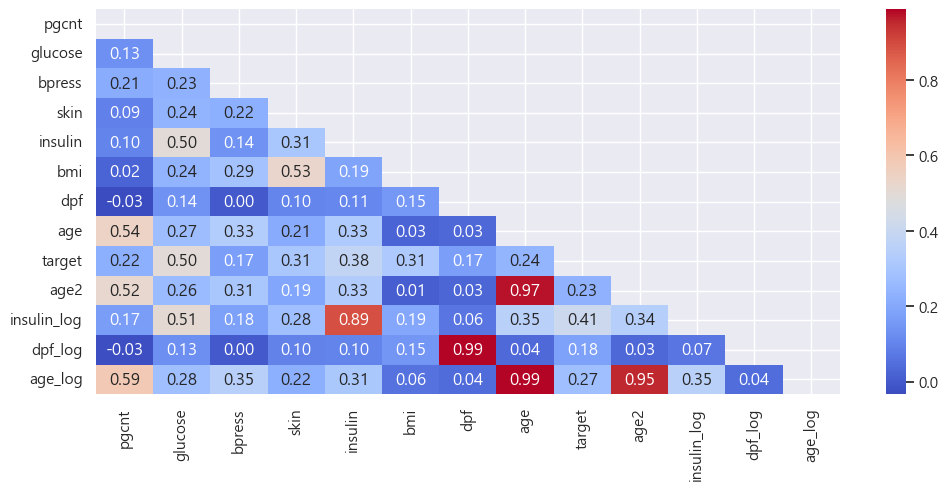

In [34]:
plt.figure(figsize=(12, 5))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), annot=True, fmt=".2f", mask=mask, cmap='coolwarm')     #---------------------------- sns 히트맵
plt.show()

In [35]:
myscore(df.drop(['age2','age', 'insulin', 'dpf'], axis=1))

 LogisticRegression
acc:0.7532	 f1:0.6122	 precision:0.6818	 recall:0.5556	 roc_auc:0.7078

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       100
           1       0.68      0.56      0.61        54

    accuracy                           0.75       154
   macro avg       0.73      0.71      0.72       154
weighted avg       0.75      0.75      0.75       154


[[86 14]
 [24 30]]

 DecisionTreeClassifier
acc:0.7468	 f1:0.6609	 precision:0.6230	 recall:0.7037	 roc_auc:0.7369

              precision    recall  f1-score   support

           0       0.83      0.77      0.80       100
           1       0.62      0.70      0.66        54

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154


[[77 23]
 [16 38]]

 RandomForestClassifier
acc:0.8442	 f1:0.7778	 precision:0.7778	 recall:0.7778	 roc_auc:0.8289

              precis

In [36]:
myscore(df.drop(['age_log','age', 'insulin', 'dpf'], axis=1))

 LogisticRegression
acc:0.7857	 f1:0.6796	 precision:0.7143	 recall:0.6481	 roc_auc:0.7541

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       100
           1       0.71      0.65      0.68        54

    accuracy                           0.79       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.78      0.79      0.78       154


[[86 14]
 [19 35]]

 DecisionTreeClassifier
acc:0.7662	 f1:0.6842	 precision:0.6500	 recall:0.7222	 roc_auc:0.7561

              precision    recall  f1-score   support

           0       0.84      0.79      0.81       100
           1       0.65      0.72      0.68        54

    accuracy                           0.77       154
   macro avg       0.75      0.76      0.75       154
weighted avg       0.77      0.77      0.77       154


[[79 21]
 [15 39]]

 RandomForestClassifier
acc:0.8442	 f1:0.7857	 precision:0.7586	 recall:0.8148	 roc_auc:0.8374

              precis

In [37]:
# 변환 전후의 타겟(target)과의 상관계수 비교
original_corr = df[['insulin', 'dpf', 'age', 'target']].corr()['target']
log_corr = df[['insulin_log', 'dpf_log', 'age_log', 'target']].corr()['target']

print("--- Target과의 상관계수 비교 ---")
print("Original:\n", original_corr)
print("\nLog Transformed:\n", log_corr)

--- Target과의 상관계수 비교 ---
Original:
 insulin    0.380339
dpf        0.173844
age        0.238356
target     1.000000
Name: target, dtype: float64

Log Transformed:
 insulin_log    0.410244
dpf_log        0.179950
age_log        0.274247
target         1.000000
Name: target, dtype: float64


### log(빠르게 성능 개선 시도) vs boxcox(통계적 추론 목적)
* 트리모델에서는 별 효과를 못본다
* 선형회귀모델에 사용하는것이 좋다

| 구분        | **Log 변환**    | **Box-Cox 변환**                                      |
| --------- | ------------- | --------------------------------------------------- |
| 기본 개념     | 로그 함수 적용      | 파라미터 λ를 갖는 일반화된 파워 변환                               |
| 수식        | `y = log(x)`  | `y = (x^λ - 1) / λ` (λ ≠ 0)<br>`y = log(x)` (λ = 0) |
| λ(람다)     | 고정 (λ = 0)    | 데이터 기반으로 최적 λ 추정                                    |
| 적용 가능 값   | **양수만 가능**    | **양수만 가능**                                          |
| 분포 개선     | 오른쪽 꼬리 감소     | 분포 왜도에 맞춰 유연하게 조정                                   |
| 정규성 향상    | 중간            | **높음**                                              |
| 분산 안정화    | 중간            | **우수**                                              |
| 이상치 영향    | 완화            | 더 강력하게 완화 가능                                        |
| 해석 용이성    | **매우 쉬움**     | 상대적으로 어려움                                           |
| 계산 비용     | 매우 낮음         | 로그보다 약간 높음                                          |
| 실무 사용 빈도  | **매우 높음**     | 중~고                                                 |
| 머신러닝 적합성  | 트리 제외 모델에 유용  | 선형/통계 모델에 특히 유리                                     |
| 트리 모델 필요성 | 거의 없음         | 거의 없음                                               |
| 음수 처리     | 불가 (shift 필요) | 불가 (shift 필요)                                       |

In [39]:

x = np.array([1, 2, 3, 4, 10])

log_x = np.log(x)
print(log_x)

[0.         0.69314718 1.09861229 1.38629436 2.30258509]


In [41]:

from scipy import stats

x = np.array([1, 2, 3, 4, 10])

boxcox_x, lam = stats.boxcox(x)

print(boxcox_x)
print("lambda:", lam)

[0.         0.66493893 1.02887664 1.27650161 2.0102601 ]
lambda: -0.12072150012066338


In [42]:
# log
np.log(x+1)

# boxcox
stats.boxcox(x)[0]

array([0.        , 0.66493893, 1.02887664, 1.27650161, 2.0102601 ])